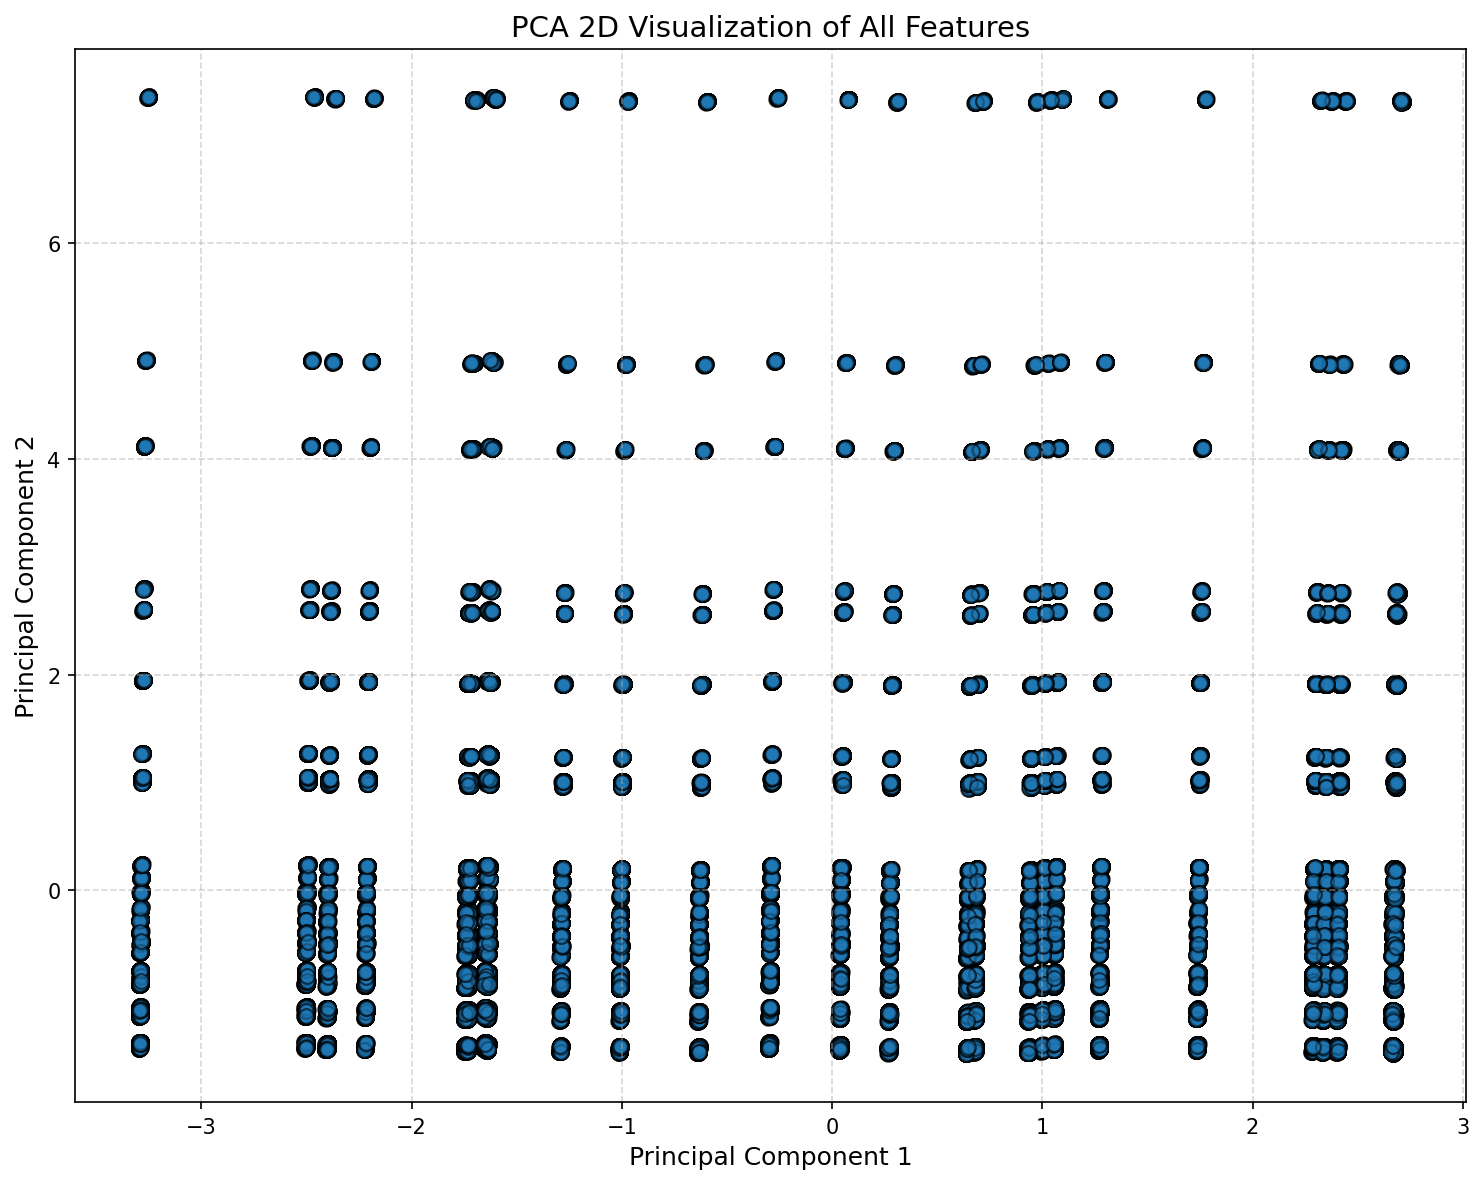

[0.21995303 0.15785568]


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../datasets/customer_shopping_data_v14.csv")

# Numerical and categorical columns
numeric_features = [
    "age", "quantity", "price", "total_price",
    "Econ_Conf", "Cons_Conf", "RealSec_Conf",
    "bloomberg_confidence", "oecd_confidence", "ipsos_confidence"
]
categorical_features = [
    "gender", "category", "payment_method",
    "season", "shopping_mall", "is_weekday", "is_holiday"
]

# Preprocessing: scaling numeric features and one-hot encoding categoricals
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

X_processed = preprocessor.fit_transform(df)

# PCA transformation
pca = PCA(n_components=2)
components = pca.fit_transform(X_processed)

# High-resolution plot
plt.figure(figsize=(10,8), dpi=150)
plt.scatter(
    components[:,0],
    components[:,1],
    alpha=0.6,
    edgecolor="k",
    s=50
)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("PCA 2D Visualization of All Features", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(pca.explained_variance_ratio_)

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../datasets/customer_shopping_data_v14.csv")

# Numeric and categorical columns
numeric_features = [
    "age", "quantity", "price", "total_price",
    "Econ_Conf", "Cons_Conf", "RealSec_Conf",
    "bloomberg_confidence", "oecd_confidence", "ipsos_confidence"
]
categorical_features = [
    "gender", "category", "payment_method",
    "season", "shopping_mall", "is_weekday", "is_holiday"
]

# Preprocessing: scale numeric, encode categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

X_processed = preprocessor.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, max_iter=250)
embedding = tsne.fit_transform(X_processed)

# Plot
plt.figure(figsize=(10,8), dpi=150)
plt.scatter(
    embedding[:,0],
    embedding[:,1],
    alpha=0.6,
    edgecolor="k",
    s=50
)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.title("t-SNE 2D Visualization (Numerical + Categorical Features)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 